In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#import numpy as np
#from keras import layers
#from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
#from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
#from keras.models import Model
#from keras.preprocessing import image
#from keras.utils import layer_utils
#from keras.utils.data_utils import get_file
#from keras.applications.imagenet_utils import preprocess_input
#import pydot
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
#from kt_utils import *

#import keras.backend as K
#K.set_image_data_format('channels_last')

#from matplotlib.pyplot import imshow

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [53]:
def plot_timeseries(data_df,metric):
    plt.plot(data_df[metric][data_df['failure']==0],'.')
    plt.plot(data_df[metric][data_df['failure']==1],'*')
    plt.xticks(rotation=90)
    
    return plt

def plot_correlation_matrix(features_df):
    corr_matrix = features_df.corr()
    plt.set_cmap('plasma')
    f = plt.figure(figsize=(15, 15))
    plt.matshow(corr_matrix, fignum=f.number)
    plt.xticks(range(features_df.shape[1]), features_df.columns, fontsize=8, rotation=90)
    plt.yticks(range(features_df.shape[1]), features_df.columns, fontsize=8)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)
    
    return corr_matrix

In [35]:
data_df = pd.read_csv('../datasets/predictive_maintenance.csv')
data_df.index = pd.to_datetime(data_df['date'])
data_df['datetime'] = pd.to_datetime(data_df['date'])

In [36]:
data_df.head(5)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,datetime
date,,,,,,,,,,,,,
2015-01-01,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015-01-01
2015-01-01,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015-01-01
2015-01-01,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2015-01-01
2015-01-01,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,2015-01-01
2015-01-01,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,2015-01-01


In [28]:
data_df.head(5)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
date,,,,,,,,,,,,
2015-01-01,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
2015-01-01,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2015-01-01,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
2015-01-01,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
2015-01-01,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [9]:
print("number of examples = " + str(len(data_df.index)))
print("number of non-failures = " + str(len(data_df['failure'][data_df['failure']==0])))
print("number of failures = " + str(len(data_df['failure'][data_df['failure']==1])))

number of examples = 124494
number of non-failures = 124388
number of failures = 106


In [13]:
data_df['date'].describe()

count     124494
unique       304
top       1/3/15
freq        1163
Name: date, dtype: object

In [41]:
print("min date = " + str(data_df.index.min()))
print("min date = " + str(data_df.index.max()))
print("number of unique dates = " + str(len(data_df['date'].unique())))

min date = 2015-01-01 00:00:00
min date = 2015-11-02 00:00:00
number of unique dates = 304


In [42]:
data_df['device'].describe()

count       124494
unique        1169
top       Z1F0Q8RT
freq           304
Name: device, dtype: object

In [43]:
print("number of unique devices = " + str(len(data_df['device'].unique())))

number of unique devices = 1169


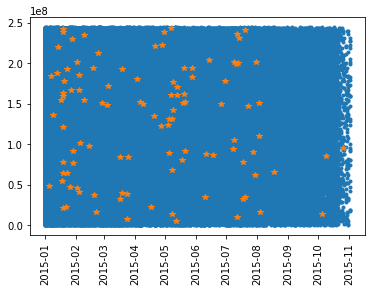

In [54]:
ts_m1 = plot_timeseries(data_df,'metric1')

In [17]:
data_df['metric1'].describe()

count    1.244940e+05
mean     1.223881e+08
std      7.045933e+07
min      0.000000e+00
25%      6.128476e+07
50%      1.227974e+08
75%      1.833096e+08
max      2.441405e+08
Name: metric1, dtype: float64

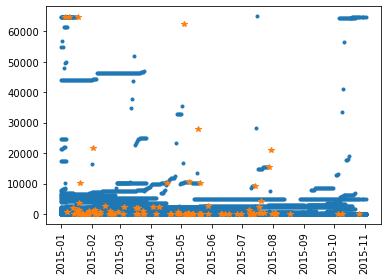

In [55]:
ts_m2 = plot_timeseries(data_df,'metric2')

In [18]:
data_df['metric2'].describe()

count    124494.000000
mean        159.484762
std        2179.657730
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       64968.000000
Name: metric2, dtype: float64

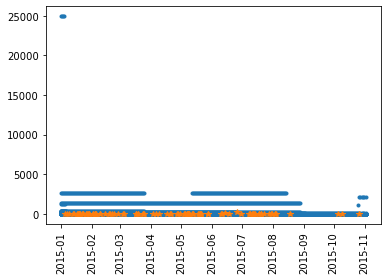

In [56]:
ts_m3 = plot_timeseries(data_df,'metric3')

In [19]:
data_df['metric3'].describe()

count    124494.000000
mean          9.940455
std         185.747321
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       24929.000000
Name: metric3, dtype: float64

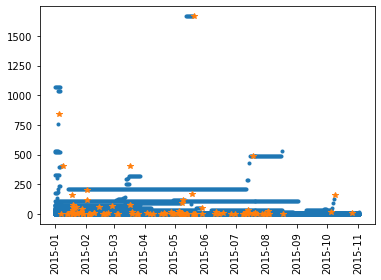

In [57]:
ts_m4 = plot_timeseries(data_df,'metric4')

In [20]:
data_df['metric4'].describe()

count    124494.000000
mean          1.741120
std          22.908507
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1666.000000
Name: metric4, dtype: float64

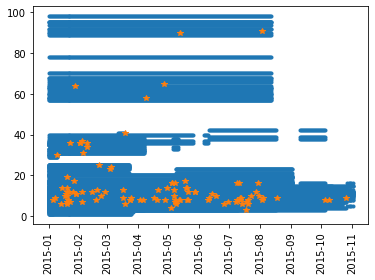

In [58]:
ts_m5 = plot_timeseries(data_df,'metric5')

In [21]:
data_df['metric5'].describe()

count    124494.000000
mean         14.222669
std          15.943028
min           1.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          98.000000
Name: metric5, dtype: float64

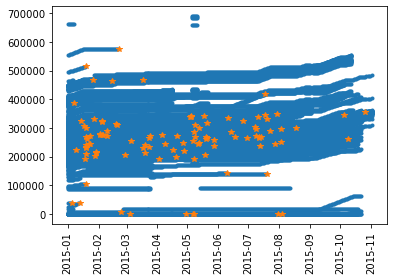

In [59]:
ts_m6 = plot_timeseries(data_df,'metric6')

In [22]:
data_df['metric6'].describe()

count    124494.000000
mean     260172.657726
std       99151.078547
min           8.000000
25%      221452.000000
50%      249799.500000
75%      310266.000000
max      689161.000000
Name: metric6, dtype: float64

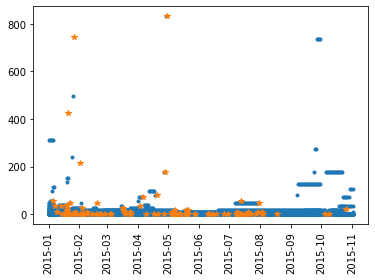

In [60]:
ts_m7 = plot_timeseries(data_df,'metric7')

In [23]:
data_df['metric7'].describe()

count    124494.000000
mean          0.292528
std           7.436924
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         832.000000
Name: metric7, dtype: float64

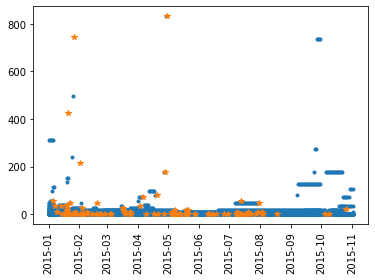

In [63]:
ts_m8 = plot_timeseries(data_df,'metric8')

In [24]:
data_df['metric8'].describe()

count    124494.000000
mean          0.292528
std           7.436924
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         832.000000
Name: metric8, dtype: float64

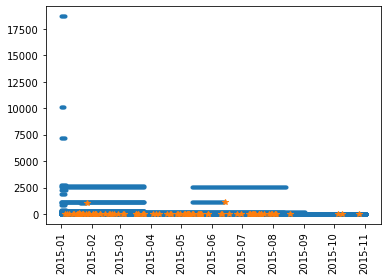

In [62]:
ts_m9 = plot_timeseries(data_df,'metric9')

In [25]:
data_df['metric9'].describe()

count    124494.000000
mean         12.451524
std         191.425623
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       18701.000000
Name: metric9, dtype: float64

In [23]:
features_df = data_df[['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8','metric9']]

In [24]:
features_df.head()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,215630672,56,0,52,6,407438,0,0,7
1,61370680,0,3,0,6,403174,0,0,0
2,173295968,0,0,0,12,237394,0,0,0
3,79694024,0,0,0,6,410186,0,0,0
4,135970480,0,0,0,15,313173,0,0,3


In [25]:
features_df.describe()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


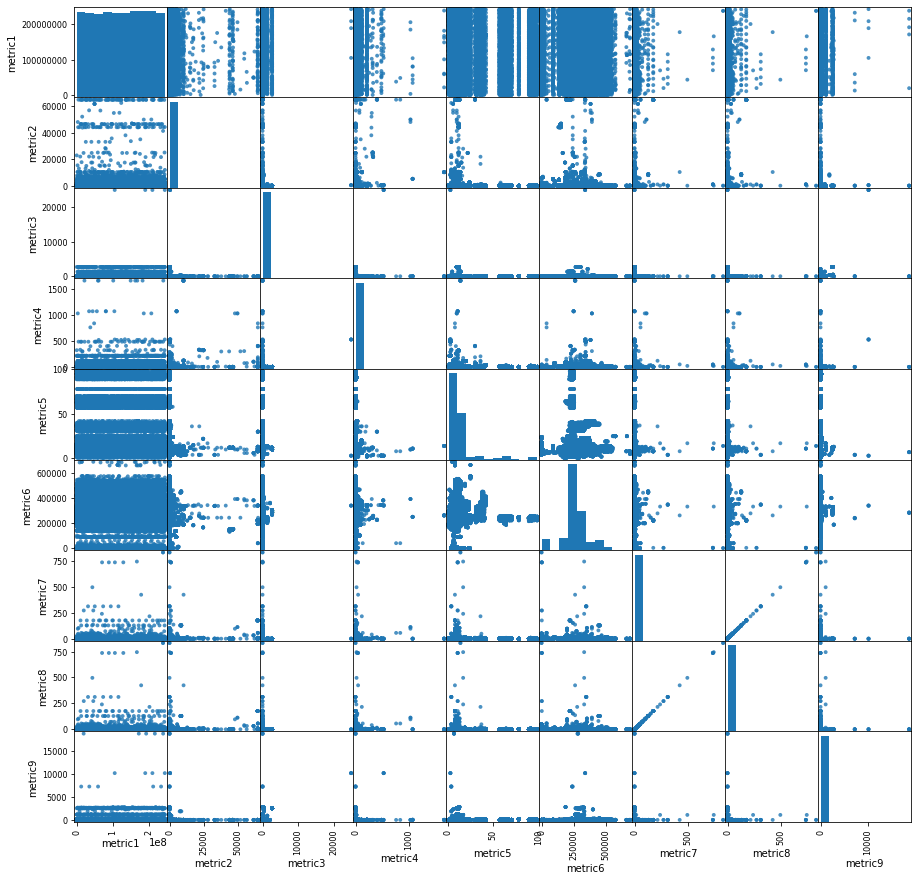

In [73]:
pair_plot = pd.plotting.scatter_matrix(features_df, figsize=(15,15), marker = '.', 
                                       hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)

<Figure size 432x288 with 0 Axes>

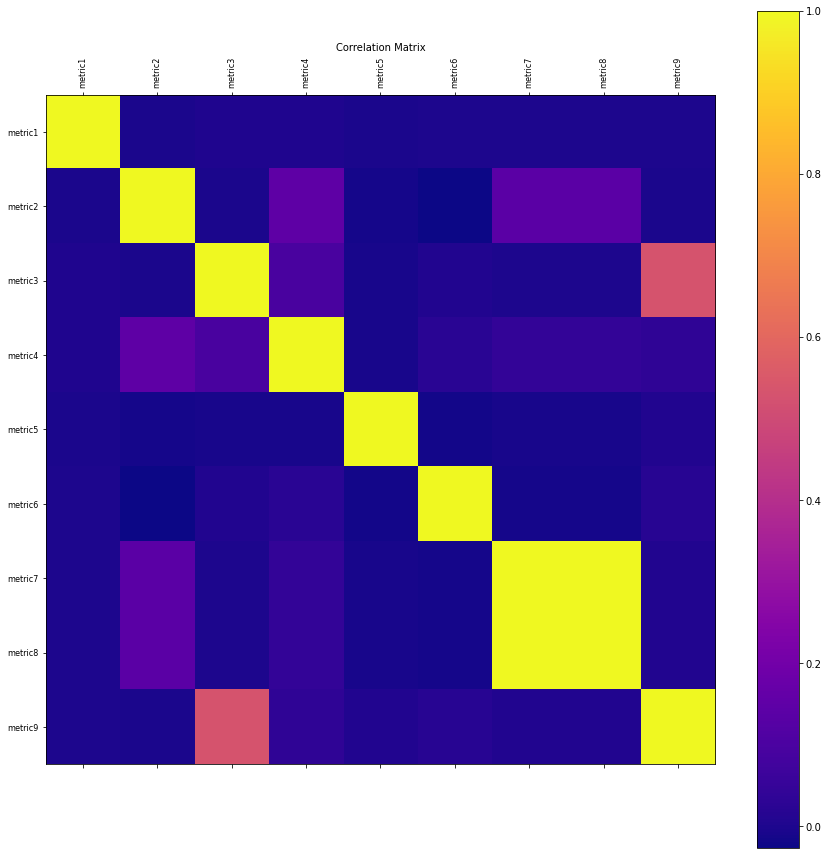

In [56]:
corr_matrix = plot_correlation_matrix(features_df)

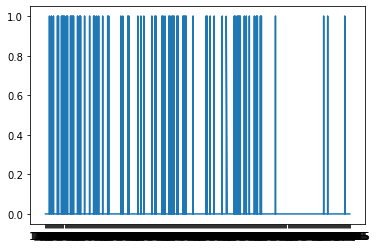

In [57]:
plt.plot(data_df['date'],data_df['failure'])

In [ ]:
def predictive_maintenace_model(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    ### END CODE HERE ###
    
    return model